# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


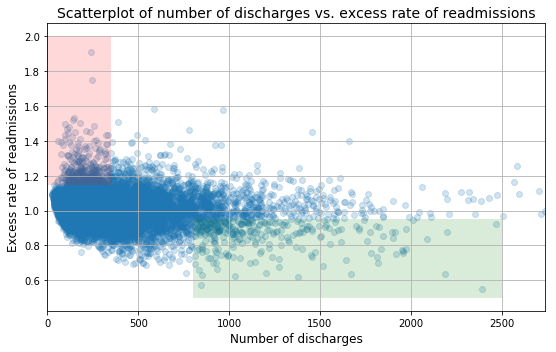

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

In [5]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


To answer this question  we should analyze the data by looking at the correlation between the rate of admissions and number of discharges in order to test this hypothesis (There is a significant correlation between hospital capacity (number of discharges) and readmission rates). There is no hypothesis test, statistic test and calculation done before conclusion above.

H0: there is no significant connection between Number of Discharges and Excess Readmission Ratio

H1: there is significant connection between Number of Discharges and Excess Readmission Ratio

In [6]:
df=clean_hospital_read_df.copy()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


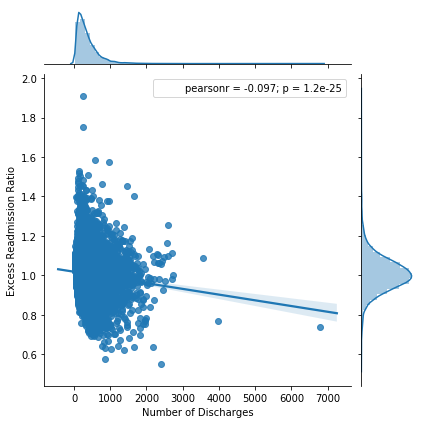

In [7]:
# see the trend in a joint plot, and use a pearson correlation coefficiant to see the lineer relations
jpl = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df, kind='reg')
jpl = jpl.annotate(stats.pearsonr)

In [8]:
df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009596,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.009596,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


As seen above, the correlation between Number of Discharges and Excess Readmission Ratio is -0.097398, which is very small


In [9]:
# calculate the r square
r_sq= 0.097398*0.097398
r_sq

0.009486370404

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

It is clear that there is a weak correlation the excess rate of readmissions and the number of discharges.The number of discharges below 100 and above 1000 seems unprompted, there is no explanation for these . It seems to have been chosen to reinforce the previous evaluation of the negative relationship between the excess rate of readmissions and number of discharges. 

In Section B, there is a hypothesis mentioning that 'In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1'. We need to perform a hypohtesis test comparing two groups of small and large hospitals



In [10]:
# t-test

small_h=df.loc[df['Number of Discharges'] < 300]
large_h=df.loc[df['Number of Discharges'] >= 300]
ratio_sh=small_h['Excess Readmission Ratio']
ratio_lh=large_h['Excess Readmission Ratio']
#clean the null values
ratio_sh=ratio_sh.dropna()
ratio_lh=ratio_lh.dropna()


In [11]:
stats.ttest_ind(ratio_sh, ratio_lh)

Ttest_indResult(statistic=8.384446244560591, pvalue=5.689538089333538e-17)

p value is less than alpha (0.01), thus we can reject the null hypothesis. (there is no difference in the excess readamission ratio for small (<300) and large (>=300) hospitals.)On the other hand, the correlation between two values is so weak that alternative hypothesis could be misleading

The scatter plot shows the correlation between two variables. Maximum and minimum values and distribution of outliers can be seen from the plot. On the other hand, if there were more than 2 variables, ti would not be possible. With this scatter plot, it cannot be seen statistical differences and quantiles differences between the two popultations. box plots, violin plots or swarm plots provide better visulation of the data and distinctly compare two populations

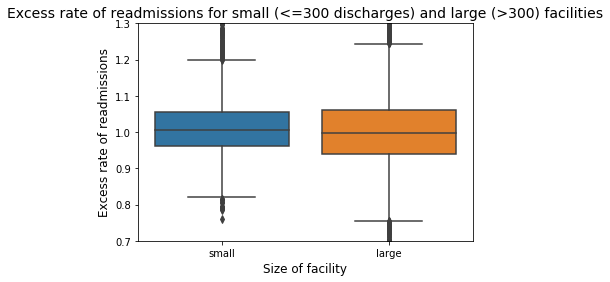

In [12]:
    df['size'] = ['small' if discharges <= 300 else 'large' for discharges in df['Number of Discharges'] ]
    box = sns.boxplot(x="size", y="Excess Readmission Ratio", data=df)

    box.set_ylim([0.7, 1.3])
    box.set_xlabel('Size of facility', fontsize=12)
    box.set_ylabel('Excess rate of readmissions', fontsize=12)
    box.set_title('Excess rate of readmissions for small (<=300 discharges) and large (>300) facilities', fontsize=14)
    plt.show()

With the boxplot, statistical differences and quantiles differences between the two popultations can be seen easily
